We will get the file directly from the API to have more space to compile the project and make it lighter

In [21]:
import requests
import zipfile
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# URL du fichier
url = "https://archive.ics.uci.edu/static/public/502/online+retail+ii.zip"

# Télécharger le fichier zip
response = requests.get(url)
response.raise_for_status()  # Vérifie si le téléchargement s'est bien passé

# Ouvrir le zip en mémoire
with zipfile.ZipFile(io.BytesIO(response.content)) as file:
    # Liste des fichiers dans le zip
    print("Fichiers dans le zip :", file.namelist())
    
    # On sait que le fichier s'appelle 'online_retail_II.xlsx'
    file_name = file.namelist()[0]

    # Lire le fichier txt directement dans un DataFrame
    df = pd.read_excel(file.open(file_name), engine='openpyxl')

    #afficher du DataFrame
    print(df)


Fichiers dans le zip : ['online_retail_II.xlsx']
       Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
525456  538171     22271                 FELTCRAFT DOLL ROSIE         2   
525457  538171     22750         FELTCRAFT PRINCESS LOLA DOLL         1   
525458  538171     22751       FELTCRAFT PRINCESS OLIVIA DOLL         1   
525459  538171     20970   PINK FLORAL FELTCRAFT SHOULDER BAG         2   
525460  538171     21931               JUMBO STORAGE BAG SUKI         2   

               InvoiceDate  Price  Customer ID    

Exploration du fichier et visualisation globales des statistiques présentes sans nétoyage préalable

In [16]:
print ('Shape :', df.shape)
df.head(10)

Shape : (525461, 8)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


In [17]:
# Aperçu et résumé des colonnes
print('Colonnes:', list(df.columns))
print('\nTypes et non-null counts:')
df.info()

print('\nNombre de valeurs uniques par colonne:')
print(df.nunique(dropna=False))

print('\nDescription statistiques (numériques):')
display(df.describe(include=[np.number]).T)

print('\nDescription (toutes les colonnes):')
display(df.describe(include='all').T)

Colonnes: ['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'Customer ID', 'Country']

Types et non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB

Nombre de valeurs uniques par colonne:
Invoice        28816
StockCode       4632
Description     4682
Quantity         825
InvoiceDate    25296
Price           1606
Cus

,count,mean,std,min,25%,50%,75%,max
Quantity,525461.0,10.337667,107.424110,-9600.00,1.00,3.0,10.00,19152.00
Price,525461.0,4.688834,146.126914,-53594.36,1.25,2.1,4.21,25111.09
Customer ID,417534.0,15360.645478,1680.811316,12346.00,13983.00,15311.0,16799.00,18287.00



Description (toutes les colonnes):


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Invoice,525461.0,28816.0,537434.0,675.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,525461,4632,85123A,3516,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,522533,4681,WHITE HANGING HEART T-LIGHT HOLDER,3549,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,525461.0,NaN,NaN,NaN,10.337667,-9600.0,1.0,3.0,10.0,19152.0,107.42411
InvoiceDate,525461,NaN,NaN,NaN,2010-06-28 11:37:36.845017856,2009-12-01 07:45:00,2010-03-21 12:20:00,2010-07-06 09:51:00,2010-10-15 12:45:00,2010-12-09 20:01:00,NaN
Price,525461.0,NaN,NaN,NaN,4.688834,-53594.36,1.25,2.1,4.21,25111.09,146.126914
Customer ID,417534.0,NaN,NaN,NaN,15360.645478,12346.0,13983.0,15311.0,16799.0,18287.0,1680.811316
Country,525461,40,United Kingdom,485852,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Valeurs manquantes et doublons
missing = df.isna().sum()
missing_percent = (missing / len(df)) * 100
miss_df = pd.DataFrame({'missing_count': missing, 'missing_percent': missing_percent}).sort_values('missing_count', ascending=False)
display(miss_df)

# doublons exacts
n_dups = df.duplicated().sum()
print('Doublons exacts (lignes complètement identiques) :', n_dups)
if n_dups>0:
    display(df[df.duplicated()].head())
    

# exemples de valeurs aberrantes: quantités négatives, prix négatifs
for col in ['Quantity','Price','UnitPrice']:
    if col in df.columns:
        print(f"{col}: min={df[col].min()}, max={df[col].max()}, mean={df[col].mean()}")


,missing_count,missing_percent
Customer ID,107927,20.539488
Description,2928,0.557225
StockCode,0,0.000000
Invoice,0,0.000000
Quantity,0,0.000000
InvoiceDate,0,0.000000
Price,0,0.000000
Country,0,0.000000


Doublons exacts (lignes complètement identiques) : 6865


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
371,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
383,489517,22130,PARTY CONE CHRISTMAS DECORATION,6,2009-12-01 11:34:00,0.85,16329.0,United Kingdom
384,489517,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,12,2009-12-01 11:34:00,0.65,16329.0,United Kingdom
385,489517,21913,VINTAGE SEASIDE JIGSAW PUZZLES,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
386,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom


Quantity: min=-9600, max=19152, mean=10.337667305470815
Price: min=-53594.36, max=25111.09, mean=4.688834478676819


In [26]:
# exemples de valeurs aberrantes: quantités négatives, prix négatifs
for col in ['Quantity','Price','UnitPrice']:
    if col in df.columns:
        print(f"{col}: min={df[col].min()}, max={df[col].max()}, mean={df[col].mean()}")


Quantity: min=-9600, max=19152, mean=10.337667305470815
Price: min=-53594.36, max=25111.09, mean=4.688834478676819


Colonnes contenant "date" : ['InvoiceDate']
InvoiceDate convertie, nulls après conversion: 0

Top 10 pays par nombre d enregistrements:


Country
United Kingdom     485852
EIRE                 9670
Germany              8129
France               5772
Netherlands          2769
Spain                1278
Switzerland          1187
Portugal             1101
Belgium              1054
Channel Islands       906
Name: count, dtype: int64

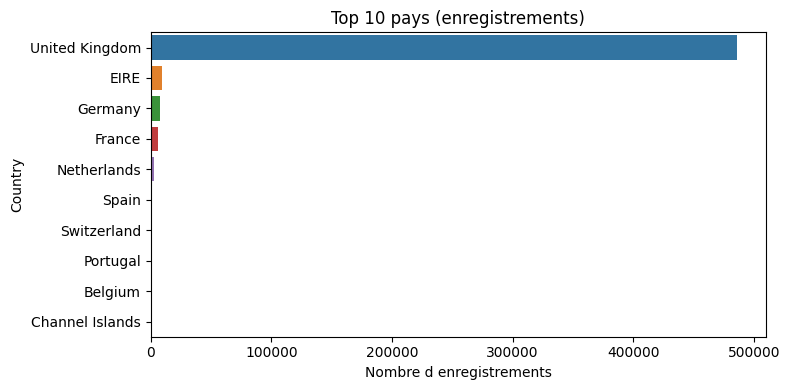


Top 10 produits (par occurrences) sur la colonne StockCode


StockCode
85123A    3516
22423     2221
85099B    2057
21212     1933
21232     1843
20725     1620
84879     1458
84991     1400
21754     1386
20914     1276
Name: count, dtype: int64

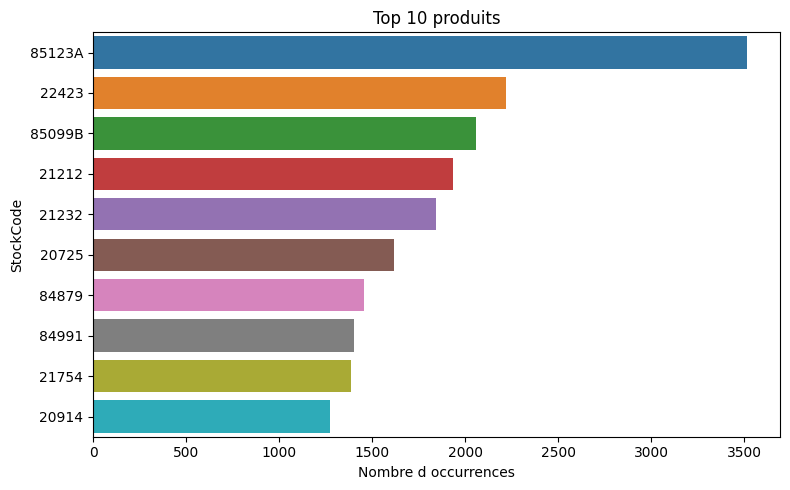


Nombre  d'invoices annulées (Invoice commençant par C): 10206

Exploration terminée. Voir sorties ci-dessus pour détails.


In [37]:
# Conversions de date et analyses rapides
# Détecter colonne date possible
date_cols = [c for c in df.columns if 'date' in c.lower()]
print('Colonnes contenant "date" :', date_cols)

if 'InvoiceDate' in df.columns:
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
    print('InvoiceDate convertie, nulls après conversion:', df['InvoiceDate'].isna().sum())

# Top pays
if 'Country' in df.columns:
    top_countries = df['Country'].value_counts().head(10)
    print('\nTop 10 pays par nombre d enregistrements:')
    display(top_countries)
    plt.figure(figsize=(8,4))
    sns.barplot(x=top_countries.values, y=top_countries.index, hue=top_countries.index, legend=False)
    plt.title('Top 10 pays (enregistrements)')
    plt.xlabel('Nombre d enregistrements')
    plt.tight_layout()
    plt.show()

# Top produits
possible_desc = [c for c in df.columns if c.lower() in ('description','productdescription','stockcode') or 'description' in c.lower()]
prod_col = None
for c in possible_desc:
    if c in df.columns:
        prod_col = c
        break

if prod_col:
    top_products = df[prod_col].value_counts().head(10)
    print('\nTop 10 produits (par occurrences) sur la colonne', prod_col)
    display(top_products)
    plt.figure(figsize=(8,5))
    sns.barplot(x=top_products.values, y=top_products.index, hue=top_products.index, legend=False)
    plt.title('Top 10 produits')
    plt.xlabel('Nombre d occurrences')
    plt.tight_layout()
    plt.show()

# Clients uniques
for c in ['CustomerID','Customer No','Customer','Customer Id']:
    if c in df.columns:
        print('\nUnique customers (colonne', c, '):', df[c].nunique(dropna=True))
        break

# Observations sur annulations (InvoiceNo commençant par 'C')
if 'Invoice' in df.columns or 'InvoiceNo' in df.columns:
    inv_col = 'InvoiceNo' if 'InvoiceNo' in df.columns else ('Invoice' if 'Invoice' in df.columns else None)
    if inv_col:
        n_cancel = df[inv_col].astype(str).str.startswith('C').sum()
        print('\nNombre  d\'invoices annulées (Invoice commençant par C):', n_cancel)

print('\nExploration terminée. Voir sorties ci-dessus pour détails.')
